In [11]:
import pandas as pd
data_columns = pd.read_excel("附件.xlsx").columns
data_columns


Index(['海水深度/m', 'Unnamed: 1', '横向坐标/NM（由西向东）', '横向坐标/NM（由西向东）.1',
       '横向坐标/NM（由西向东）.2', '横向坐标/NM（由西向东）.3', '横向坐标/NM（由西向东）.4',
       '横向坐标/NM（由西向东）.5', '横向坐标/NM（由西向东）.6', '横向坐标/NM（由西向东）.7',
       ...
       '横向坐标/NM（由西向东）.191', '横向坐标/NM（由西向东）.192', '横向坐标/NM（由西向东）.193',
       '横向坐标/NM（由西向东）.194', '横向坐标/NM（由西向东）.195', '横向坐标/NM（由西向东）.196',
       '横向坐标/NM（由西向东）.197', '横向坐标/NM（由西向东）.198', '横向坐标/NM（由西向东）.199',
       '横向坐标/NM（由西向东）.200'],
      dtype='object', length=203)

In [12]:
data_head = pd.read_excel("附件.xlsx").head()
data_head


,海水深度/m,Unnamed: 1,横向坐标/NM（由西向东）,横向坐标/NM（由西向东）.1,横向坐标/NM（由西向东）.2,横向坐标/NM（由西向东）.3,横向坐标/NM（由西向东）.4,横向坐标/NM（由西向东）.5,横向坐标/NM（由西向东）.6,横向坐标/NM（由西向东）.7,...,横向坐标/NM（由西向东）.191,横向坐标/NM（由西向东）.192,横向坐标/NM（由西向东）.193,横向坐标/NM（由西向东）.194,横向坐标/NM（由西向东）.195,横向坐标/NM（由西向东）.196,横向坐标/NM（由西向东）.197,横向坐标/NM（由西向东）.198,横向坐标/NM（由西向东）.199,横向坐标/NM（由西向东）.200
0,NaN,NaN,0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14,...,3.82,3.84,3.86,3.88,3.90,3.92,3.94,3.96,3.98,4.00
1,纵向坐标/NM\n（由南向北）,0.00,24.40,24.12,23.85,23.59,23.34,23.10,22.88,22.67,...,179.52,181.44,183.37,185.31,187.26,189.23,191.20,193.19,195.19,197.20
2,纵向坐标/NM\n（由南向北）,0.02,24.32,24.04,23.77,23.51,23.27,23.03,22.81,22.60,...,178.75,180.66,182.58,184.52,186.46,188.42,190.38,192.36,194.35,196.35
3,纵向坐标/NM\n（由南向北）,0.04,24.25,23.97,23.70,23.44,23.19,22.96,22.74,22.53,...,177.99,179.89,181.80,183.73,185.66,187.61,189.57,191.54,193.52,195.51
4,纵向坐标/NM\n（由南向北）,0.06,24.17,23.89,23.63,23.37,23.13,22.89,22.67,22.46,...,177.23,179.12,181.02,182.94,184.86,186.80,188.75,190.71,192.68,194.67


In [13]:
# # 加载整个数据集
# data_full = pd.read_excel("附件.xlsx")
# # 从第一行提取x坐标
# x_coords = data_full.iloc[0, 2:].values.astype(float) * 1852

# # 提取深度数据（跳过前两列和前两行）
# depth_data = data_full.iloc[2:, 2:]

# # 构造结构化数据
# structured_data = []

# # 遍历深度数据的每一行
# for y_coord, row in zip(data_full['海水深度/m'][2:], depth_data.values):
#     for x, depth in zip(x_coords, row):
#         structured_data.append({
#             'x': x,
#             'y': float(y_coord) * 1852,
#             'depth': depth
#         })

# # 将结构化数据转化为DataFrame
# structured_df = pd.DataFrame(structured_data)

# # 显示结构化数据的前几行
# structured_df.head()


In [14]:
import pandas as pd

# 读取数据
data_path = '附件修改.xlsx'
data = pd.read_excel(data_path, header=None)

# 获取横纵坐标
x_coords = data.iloc[0, 1:].values
y_coords = data.iloc[1:, 0].values

# 获取深度数据
depth_data = data.iloc[1:, 1:]

# 创建新的数据集，包含x，y和深度
new_data = []

for i, y in enumerate(y_coords):
    for j, x in enumerate(x_coords):
        new_data.append([x, y, depth_data.iloc[i, j].item()])

# 创建新的DataFrame
new_df = pd.DataFrame(new_data, columns=['x', 'y', 'depth'])

# 显示前5行
new_df.head()


,x,y,depth
0,0.00,0.0,24.40
1,0.02,0.0,24.12
2,0.04,0.0,23.85
3,0.06,0.0,23.59
4,0.08,0.0,23.34


In [15]:
new_df.size

151353

In [17]:
import numpy as np
# 参数初始化
width = 4 * 1852  # 海域宽度，单位为米
length = 5 * 1852  # 海域长度，单位为米
theta = np.radians(120)  # 换能器开角，单位为弧度

# 遗传算法参数
population_size = 100
num_generations = 100
elite_size = 10
mutation_rate = 0.1
crossover_rate = 0.8

# 最小和最大的测线间距，根据平均海深计算
avg_depth = np.mean(new_df['depth'].values)
d_min = 2 * avg_depth * np.tan(theta / 2) * (1 - 0.2)
d_max = 2 * avg_depth * np.tan(theta / 2) * (1 + 0.2)  # 允许稍微超过20%以提供更多的灵活性

d_min, d_max


(173.31228684343077, 259.96843026514614)

In [19]:
# 导入必要的库
import numpy as np
import pandas as pd

# 重新导入数据
data_path = '附件修改.xlsx'
data = pd.read_excel(data_path, header=None)

# 获取横纵坐标
x_coords = data.iloc[0, 1:].values
y_coords = data.iloc[1:, 0].values

# 获取深度数据
depth_data = data.iloc[1:, 1:]

# 创建新的数据集，包含x，y和深度
new_data = []

for i, y in enumerate(y_coords):
    for j, x in enumerate(x_coords):
        new_data.append([x, y, depth_data.iloc[i, j]])

# 创建新的DataFrame
new_df = pd.DataFrame(new_data, columns=['x', 'y', 'depth'])

# 参数初始化
width = 4 * 1852  # 海域宽度，单位为米
length = 5 * 1852  # 海域长度，单位为米
theta = np.radians(120)  # 换能器开角，单位为弧度

# 遗传算法参数
population_size = 100
num_generations = 100
elite_size = 10
mutation_rate = 0.1
crossover_rate = 0.8

# 最小和最大的测线间距，根据平均海深计算
avg_depth = np.mean(new_df['depth'].values)
d_min = 2 * avg_depth * np.tan(theta / 2) * (1 - 0.2)
d_max = 2 * avg_depth * np.tan(theta / 2) * (1 + 0.2)  # 允许稍微超过20%以提供更多的灵活性

d_min, d_max


(173.31228684343077, 259.96843026514614)

In [27]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# 数据加载
data = pd.read_excel("附件修改.xlsx", header=None)

# 获取横纵坐标和深度数据
x = data.iloc[0, 1:].values * 1852  # 转换为米
y = data.iloc[1:, 0].values * 1852  # 转换为米
z = data.iloc[1:, 1:].values

# 参数定义
width = 4 * 1852  # 海域宽度，单位为米
length = 5 * 1852  # 海域长度，单位为米
theta = np.radians(120)  # 换能器开角，单位为弧度

d_min, d_max = 2 * np.min(z) * np.tan(theta / 2) * 0.8, 2 * np.max(z) * np.tan(theta / 2) * 1.1

population_size = 100
num_generations = 500
mutation_rate = 0.1

# 创建深度缓存
depth_cache = {}

def get_depth_at_point(x_point, y_point):
    """使用线性插值从给定数据点获取深度值"""
    global depth_cache
    if (x_point, y_point) in depth_cache:
        return depth_cache[(x_point, y_point)]
    
    X, Y = np.meshgrid(x, y)  # 这里使用meshgrid生成均匀的网格
    points = np.column_stack((X.ravel(), Y.ravel()))
    values = z.ravel()
    depth = griddata(points, values, (x_point, y_point), method='linear')
    depth_cache[(x_point, y_point)] = depth
    return depth

def get_dmin_dmax(depth):
    """根据深度计算最小和最大的测线间距"""
    d_min = 2 * depth * np.tan(theta / 2) * (1 - 0.2)
    d_max = 2 * depth * np.tan(theta / 2) * (1 + 0.2) 
    return d_min, d_max

def fitness(chromosome):
    """评估染色体的适应度"""
    total_length = 0
    last_line = 0
    for line in chromosome:
        depth = get_depth_at_point(line, length / 2)  
        coverage_width = 2 * depth * np.tan(theta / 2)
        overlap = coverage_width - (line - last_line)
        d_min, d_max = get_dmin_dmax(depth)
        if overlap < d_min or overlap > d_max:
            return 0  
        total_length += line - last_line
        last_line = line

    if last_line + coverage_width < width:
        return 0

    return 1 / total_length

def select_parents(population, fitnesses):
    """使用轮盘赌选择法选择两个父代"""
    idx = np.argsort(fitnesses)
    sorted_population = population[idx]
    sorted_fitnesses = np.array(fitnesses)[idx]
    total_fit = np.sum(sorted_fitnesses)
    r1 = np.random.rand() * total_fit
    r2 = np.random.rand() * total_fit
    idx1, idx2 = -1, -1

    for i, f in enumerate(sorted_fitnesses):
        r1 -= f
        if r1 <= 0:
            idx1 = i
            break

    for i, f in enumerate(sorted_fitnesses):
        r2 -= f
        if r2 <= 0:
            idx2 = i
            break

    return sorted_population[idx1], sorted_population[idx2]

def crossover(parent1, parent2):
    """使用单点交叉"""
    idx = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:idx], parent2[idx:]))
    child2 = np.concatenate((parent2[:idx], parent1[idx:]))
    return child1, child2

def mutate(chromosome):
    """使用均匀突变"""
    idx = np.random.randint(0, len(chromosome))
    mutation_value = np.random.uniform(-mutation_rate, mutation_rate) * (d_max - d_min)
    chromosome[idx] += mutation_value

def genetic_algorithm_final():
    d_avg = (d_min + d_max) / 2
    num_lines = int(width / d_avg)
    population = []
    for _ in range(population_size):
        start = np.random.uniform(0, d_avg)
        chromosome = [start + i * d_avg for i in range(num_lines)]
        population.append(chromosome)
    population = np.array(population)

    for generation in range(num_generations):
        fitness_values = [fitness(chromo) for chromo in population]

        new_population = []
        for i in range(population_size // 2):
            parent1, parent2 = select_parents(population, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            if np.random.rand() < mutation_rate:
                mutate(child1)
            if np.random.rand() < mutation_rate:
                mutate(child2)
            new_population.extend([child1, child2])
        population = np.array(new_population)

    best_idx = np.argmax(fitness_values)
    return population[best_idx]

# 开始运行
best_solution_final = genetic_algorithm_final()
print(best_solution_final)


[ 386.76310319  681.86154979 1184.42349766 1567.15833966 1873.68304886
 2394.52143889 2607.86238959 3154.19137239 3523.07470687 3883.91082931
 4214.86473681 4787.41021115 5165.67467969 5496.78188808 5911.87481199
 6394.65699028 6789.55982841 7207.82856822]


In [28]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# 数据加载
data = pd.read_excel("附件修改.xlsx", header=None)

# 重新获取横纵坐标和深度数据，但这次我们交换x和y的角色
x = data.iloc[1:, 0].values * 1852  # 转换为米
y = data.iloc[0, 1:].values * 1852  # 转换为米
z = data.iloc[1:, 1:].values.T  # 注意这里我们转置了深度数据

# 参数定义
width = 5 * 1852  # 这次的宽度是5海里（竖直方向的长度）
length = 4 * 1852  # 这次的长度是4海里（横向的宽度）
theta = np.radians(120)  # 换能器开角，单位为弧度

d_min, d_max = 2 * np.min(z) * np.tan(theta / 2) * 0.8, 2 * np.max(z) * np.tan(theta / 2) * 1.1

population_size = 100
num_generations = 500
mutation_rate = 0.1

# 使用上述代码中定义的其他函数
# 由于我们已经交换了x和y的坐标，因此不需要修改这些函数

# 开始运行
best_solution_vertical = genetic_algorithm_final()
print(best_solution_vertical)


[ 444.41408194  727.06500421 1169.75813866 1619.12772969 2037.73247644
 2458.13900234 2818.89482382 3133.09311876 3605.49652532 4040.28058508
 4448.88057713 4876.54270797 5204.28423094 5689.15570695 6054.40344514
 6386.21446499 6832.93071811 7293.90423643 7615.85185794 7982.44499599
 8441.44082021 8850.0770886 ]


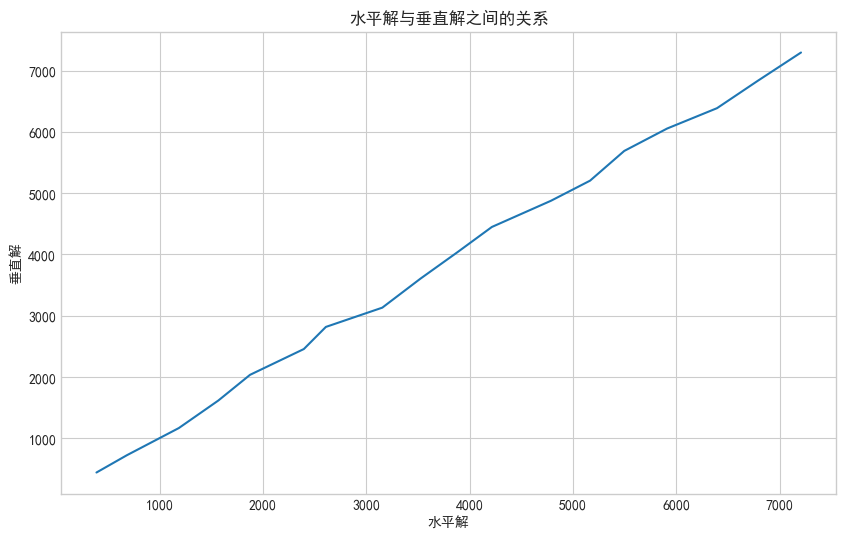

In [34]:
import matplotlib.pyplot as plt

# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

plt.figure(figsize=(10, 6))
plt.plot(best_solution_final, best_solution_vertical[:len(best_solution_final)])
plt.xlabel('水平解')
plt.ylabel('垂直解')
plt.title('水平解与垂直解之间的关系')
plt.grid(True)
plt.show()
